In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import plotly
plotly.offline.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('state2.csv', delimiter=',')
df.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,26150,46,5,1,0,0,1,0,0,0,0
1,6605,71,1,0,0,0,1,0,0,0,0
2,18548,38,8,0,1,1,0,0,0,0,0
3,47668,54,3,0,1,1,0,0,0,0,0
4,44554,59,9,2,1,0,0,0,0,1,0


In [3]:
print(df.columns)

Index(['income', 'age', 'years_with_bank', 'nbr_children', 'gender_F ',
       'marital_status_1', 'marital_status_2', 'marital_status_3',
       'state_code_Midwest', 'state_code_Northeast', 'state_code_South'],
      dtype='object')


In [4]:
df.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,26150,46,5,1,0,0,1,0,0,0,0
1,6605,71,1,0,0,0,1,0,0,0,0
2,18548,38,8,0,1,1,0,0,0,0,0
3,47668,54,3,0,1,1,0,0,0,0,0
4,44554,59,9,2,1,0,0,0,0,1,0


In [5]:

from sklearn.preprocessing import MinMaxScaler
# create a new DataFrame with only the columns to standardize
subset = df[['income', 'age','years_with_bank','nbr_children']]

# instantiate StandardScaler object
scaler = MinMaxScaler()

# fit scaler to data
scaler.fit(subset)


# transform data
subset_transformed = scaler.transform(subset)

# transform data and overwrite original columns
df_scaled=df.copy()
df_scaled[['income', 'age','years_with_bank','nbr_children']] = scaler.transform(subset)

df_scaled['gender_F ']=0.5* df_scaled['gender_F ']
df_scaled['marital_status_1']= 0.5* df_scaled['marital_status_1']
df_scaled['marital_status_2']= 0.5* df_scaled['marital_status_2']
df_scaled['marital_status_3']= 0.5* df_scaled['marital_status_3']
df_scaled['state_code_Midwest']= 0.5* df_scaled['state_code_Midwest']
df_scaled['state_code_Northeast']= 0.5* df_scaled['state_code_Northeast']
df_scaled['state_code_South']= 0.5* df_scaled['state_code_South']

df_scaled.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,0.181399,0.434211,0.555556,0.2,0.0,0.0,0.5,0.0,0.0,0.0,0.0
1,0.045818,0.763158,0.111111,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
2,0.128665,0.328947,0.888889,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0
3,0.330667,0.539474,0.333333,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0
4,0.309066,0.605263,1.000000,0.4,0.5,0.0,0.0,0.0,0.0,0.5,0.0


In [6]:
# import Kmeans from sklearn
from sklearn.cluster import KMeans


inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)

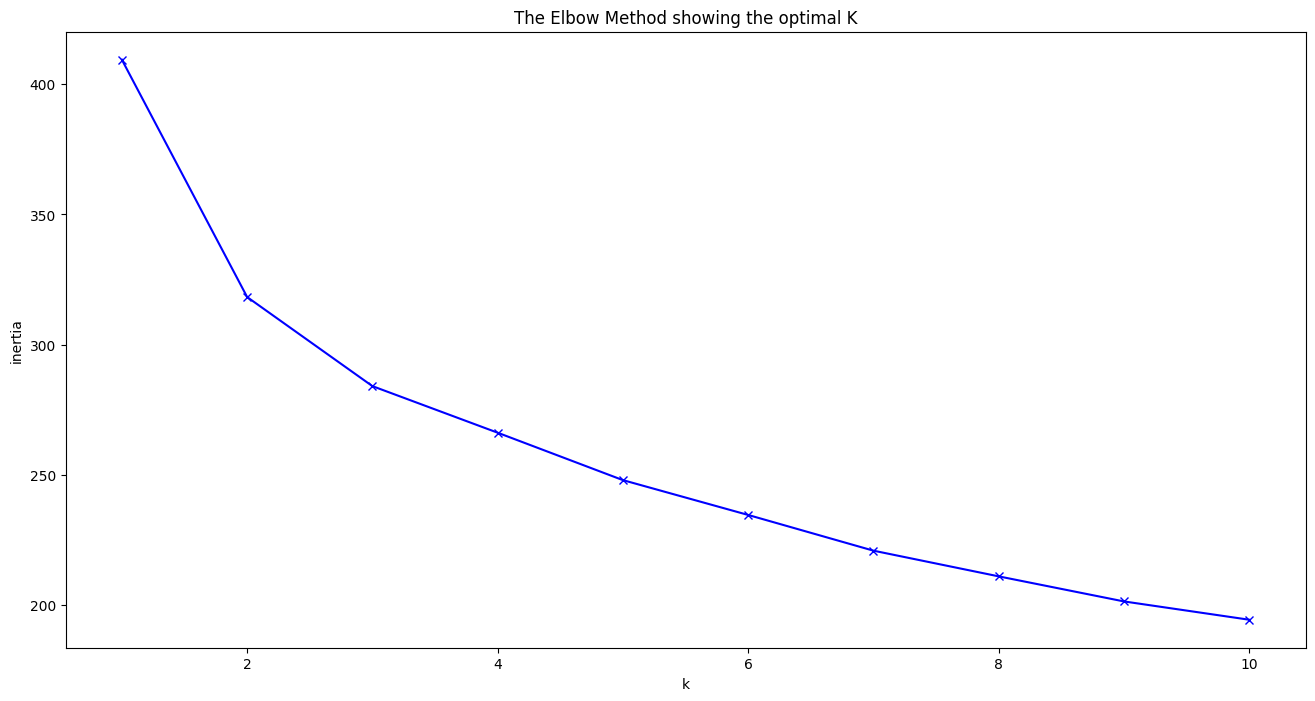

In [7]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [8]:
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    label=kmeanModel.predict(df_scaled)
    silhouettes.append(silhouette_score(df_scaled,label))

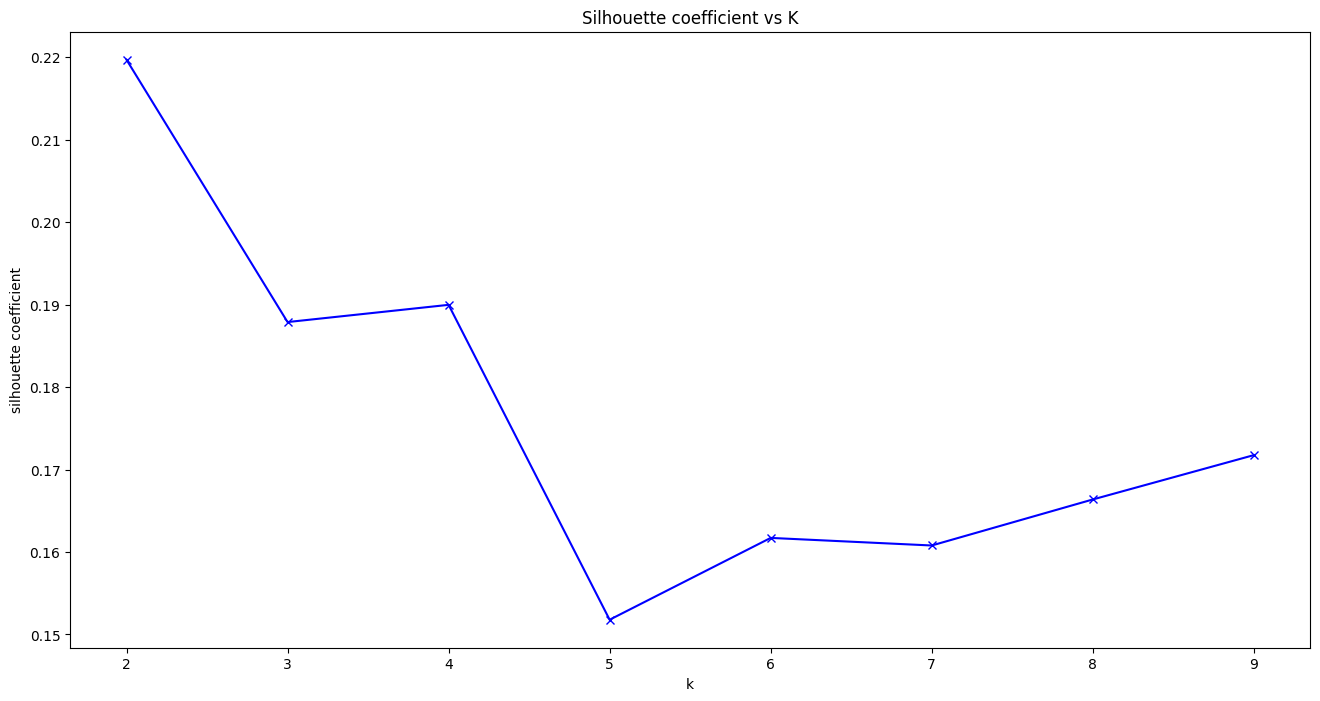

In [9]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [10]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(df_scaled)

In [11]:
y_km

array([0, 2, 1, 1, 0, 2, 1, 0, 3, 0, 1, 1, 2, 1, 2, 1, 3, 1, 0, 1, 2, 2,
       0, 1, 3, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0,
       1, 2, 2, 3, 3, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 2, 3, 1, 1, 0, 0, 2, 2,
       1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 2, 3, 0, 0, 0, 2, 0, 3, 0, 0, 0, 1,
       1, 0, 0, 1, 2, 0, 3, 2, 0, 0, 3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 0, 2,
       1, 2, 0, 1, 0, 0, 1, 1, 3, 0, 0, 2, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2,
       2, 0, 1, 0, 2, 0, 0, 0, 1, 3, 0, 3, 2, 0, 2, 1, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1,
       2, 3, 0, 0, 1, 1, 0, 0, 3, 2, 2, 0, 1, 1, 0, 1, 1, 3, 1, 2, 2, 3,
       1, 3, 3, 2, 1, 0, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1,
       1, 1, 1, 3, 3, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 2, 2, 0, 3, 0,
       1, 1, 2, 1, 3, 3, 3, 1, 1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1,
       3, 0, 2, 1, 1, 0, 3, 1, 0, 1, 1, 0, 1, 1, 1,

In [12]:
df_scaled_with_clusters =df_scaled.copy()
df_scaled_with_clusters['label']=y_km
df_scaled_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,0.181399,0.434211,0.555556,0.2,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0
1,0.045818,0.763158,0.111111,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,2
2,0.128665,0.328947,0.888889,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1
3,0.330667,0.539474,0.333333,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1
4,0.309066,0.605263,1.000000,0.4,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0


In [13]:
df_scaled_with_clusters['label'].value_counts()

label
1    275
0    197
2    185
3     90
Name: count, dtype: int64

In [14]:
df_with_clusters =df.copy()
df_with_clusters['label']=y_km
df_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,26150,46,5,1,0,0,1,0,0,0,0,0
1,6605,71,1,0,0,0,1,0,0,0,0,2
2,18548,38,8,0,1,1,0,0,0,0,0,1
3,47668,54,3,0,1,1,0,0,0,0,0,1
4,44554,59,9,2,1,0,0,0,0,1,0,0


In [15]:
cluster_0_means = df[df_scaled_with_clusters['label']==0].mean()
cluster_1_means = df[df_scaled_with_clusters['label']==1].mean()
cluster_2_means = df[df_scaled_with_clusters['label']==2].mean()
cluster_3_means = df[df_scaled_with_clusters['label']==3].mean()

means= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means])
means

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,26587.583756,55.522843,6.548223,0.868020,0.507614,0.010152,0.873096,0.020305,0.182741,0.218274,0.263959
1,14091.850909,29.658182,3.774545,0.000000,0.578182,0.996364,0.000000,0.000000,0.181818,0.203636,0.247273
2,26206.978378,47.870270,1.756757,1.075676,0.562162,0.000000,0.978378,0.000000,0.254054,0.205405,0.205405
3,33519.133333,42.022222,2.955556,1.822222,0.611111,0.000000,0.000000,0.488889,0.244444,0.122222,0.277778


In [16]:
cluster_0_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==0].mean()
cluster_1_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==1].mean()
cluster_2_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==2].mean()
cluster_3_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==3].mean()

means= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means])
means=means.drop('label',axis=1)
means

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,0.184435,0.559511,0.727580,0.173604,0.253807,0.005076,0.436548,0.010152,0.091371,0.109137,0.131980
1,0.097753,0.219187,0.419394,0.000000,0.289091,0.498182,0.000000,0.000000,0.090909,0.101818,0.123636
2,0.181795,0.458819,0.195195,0.215135,0.281081,0.000000,0.489189,0.000000,0.127027,0.102703,0.102703
3,0.232518,0.381871,0.328395,0.364444,0.305556,0.000000,0.000000,0.244444,0.122222,0.061111,0.138889


In [17]:
import plotly.graph_objects as go


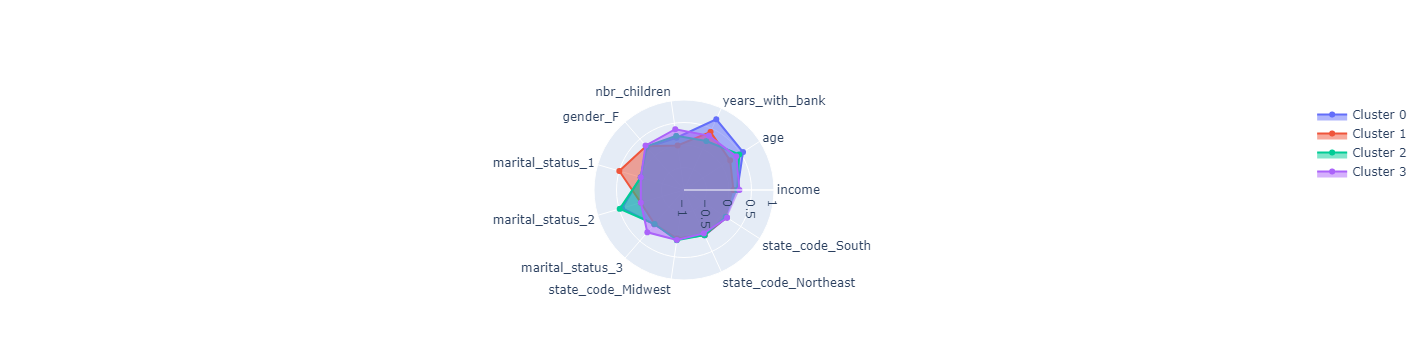

In [18]:

features = list(means.columns)

fig = go.Figure()

clusters=[0,1,2,3]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-1, 1]
        )),
      showlegend=True
    )

fig.show()

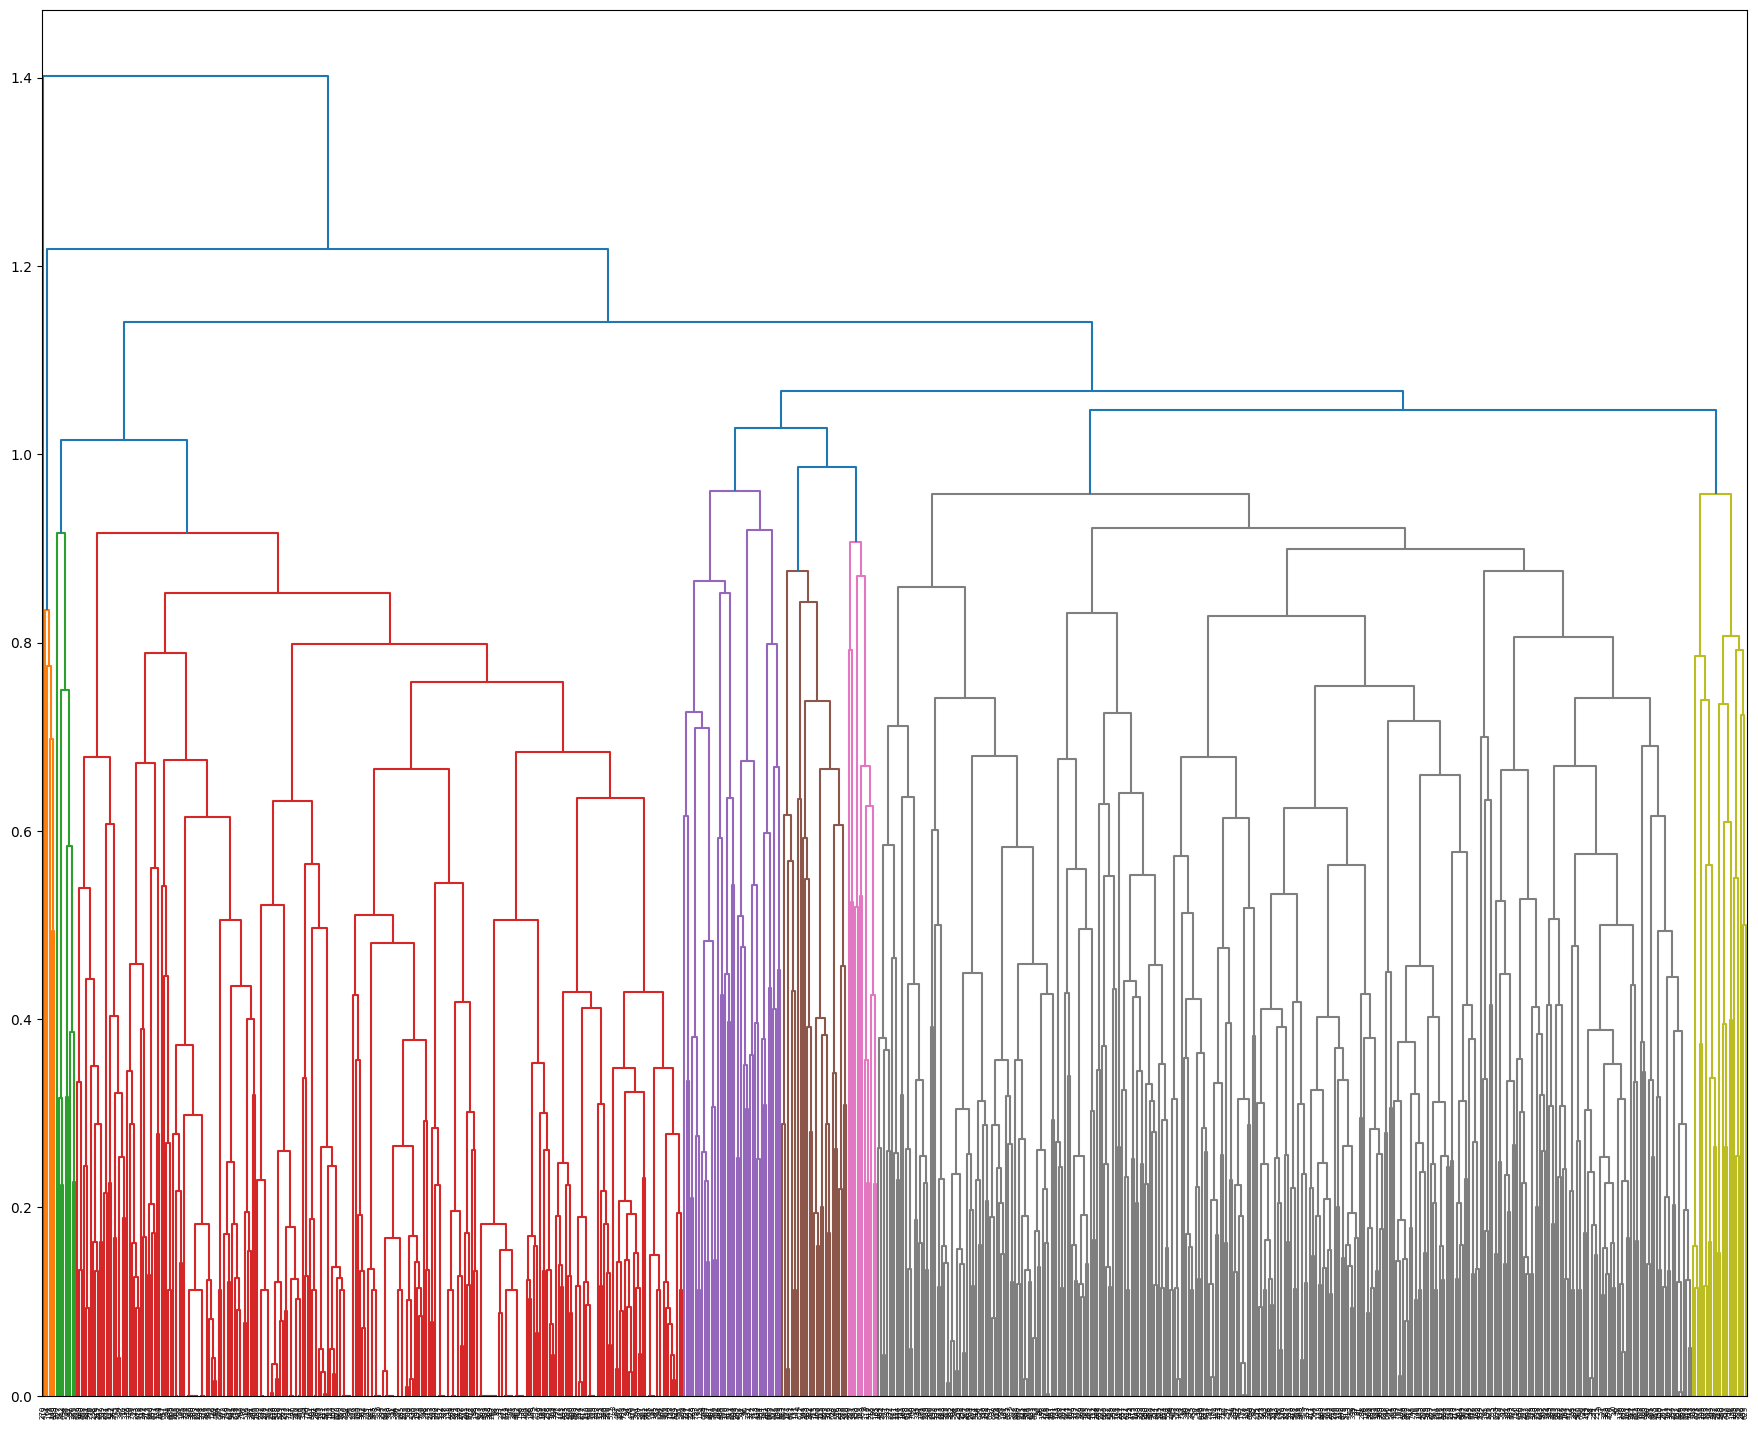

In [19]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'average' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

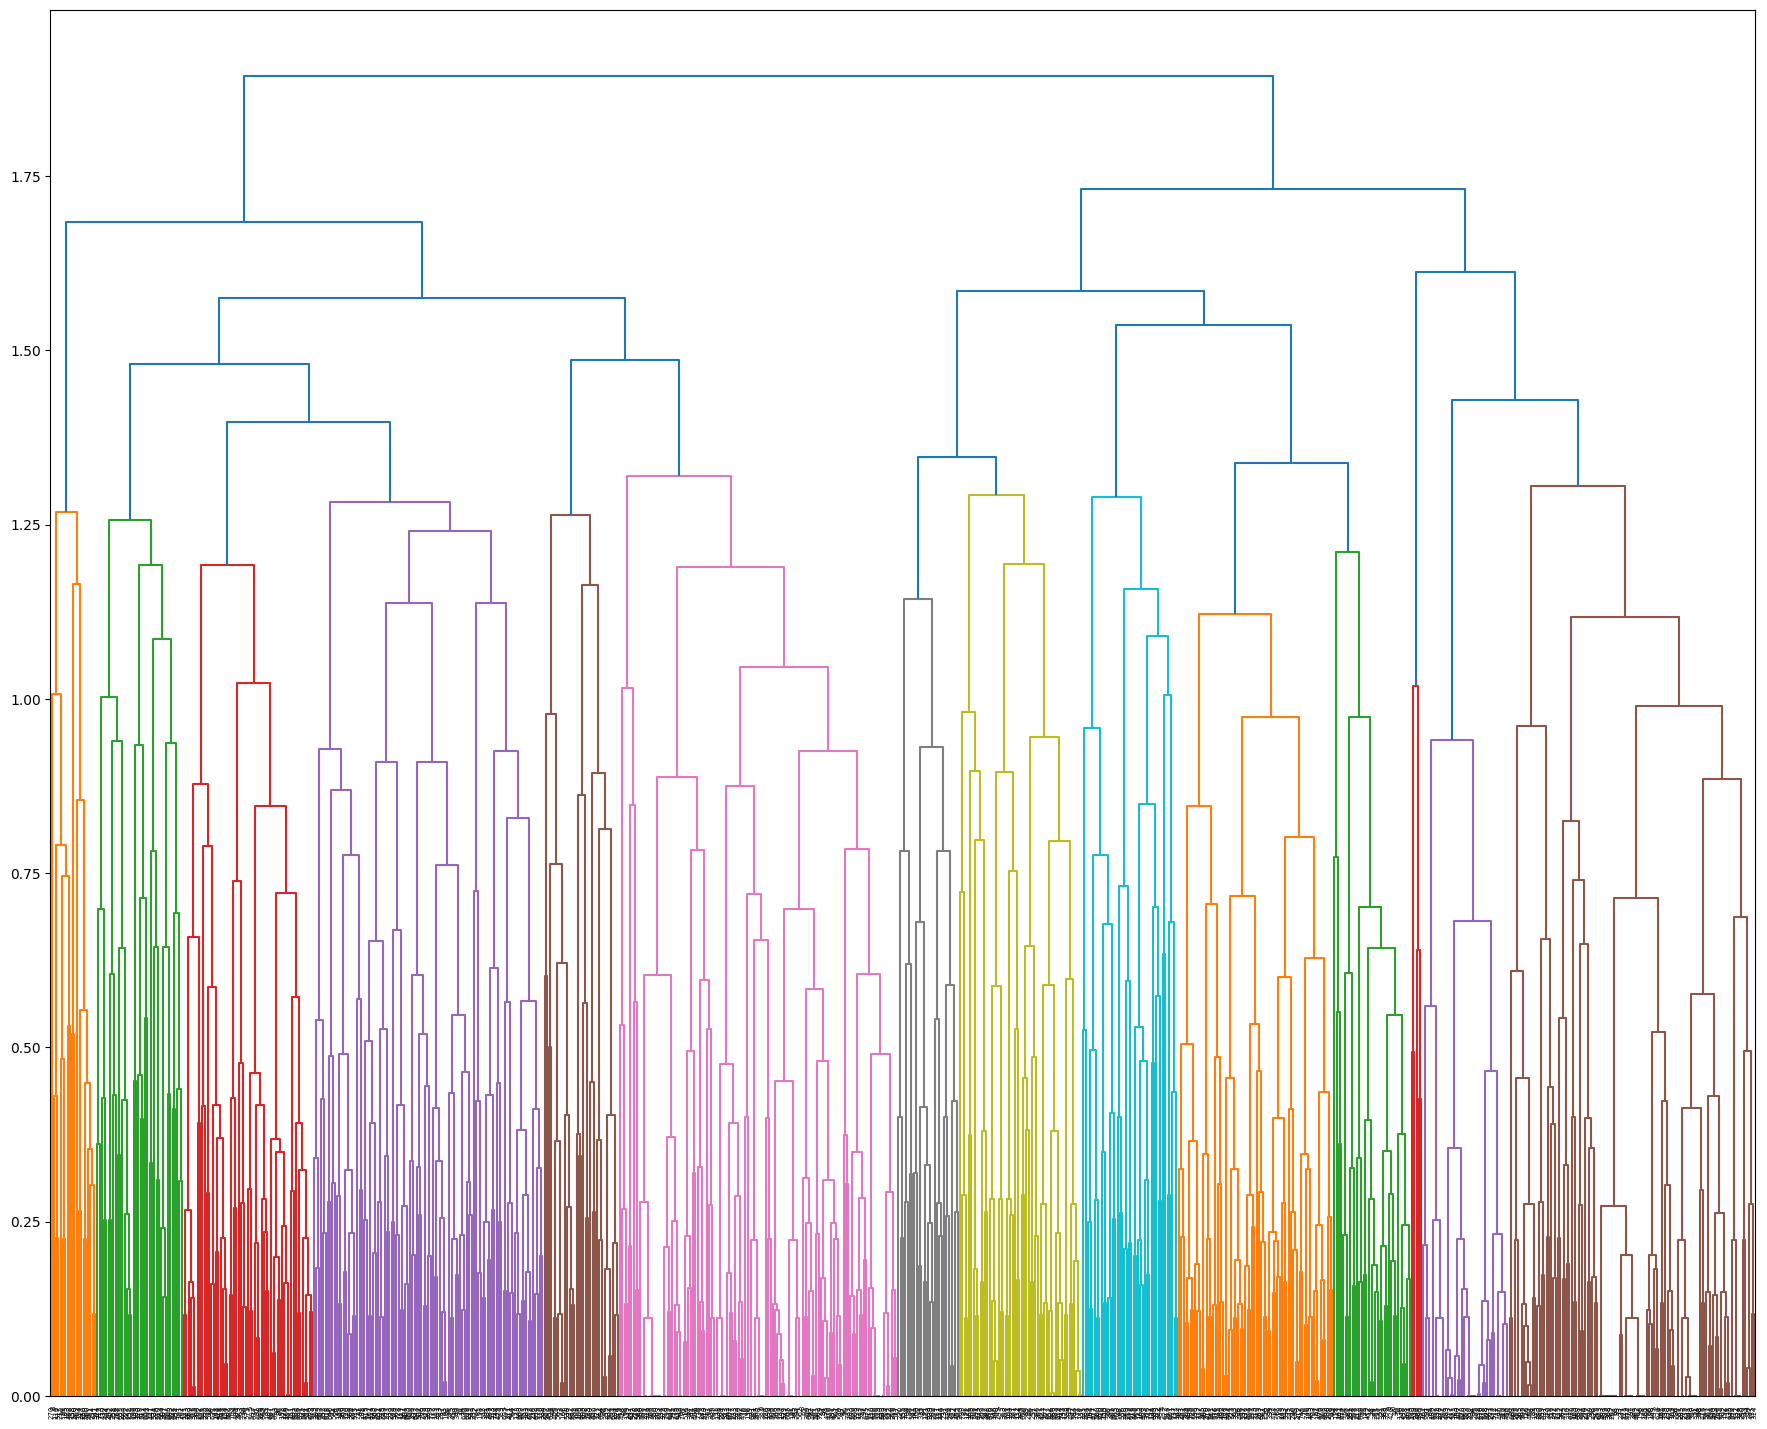

In [20]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'complete' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

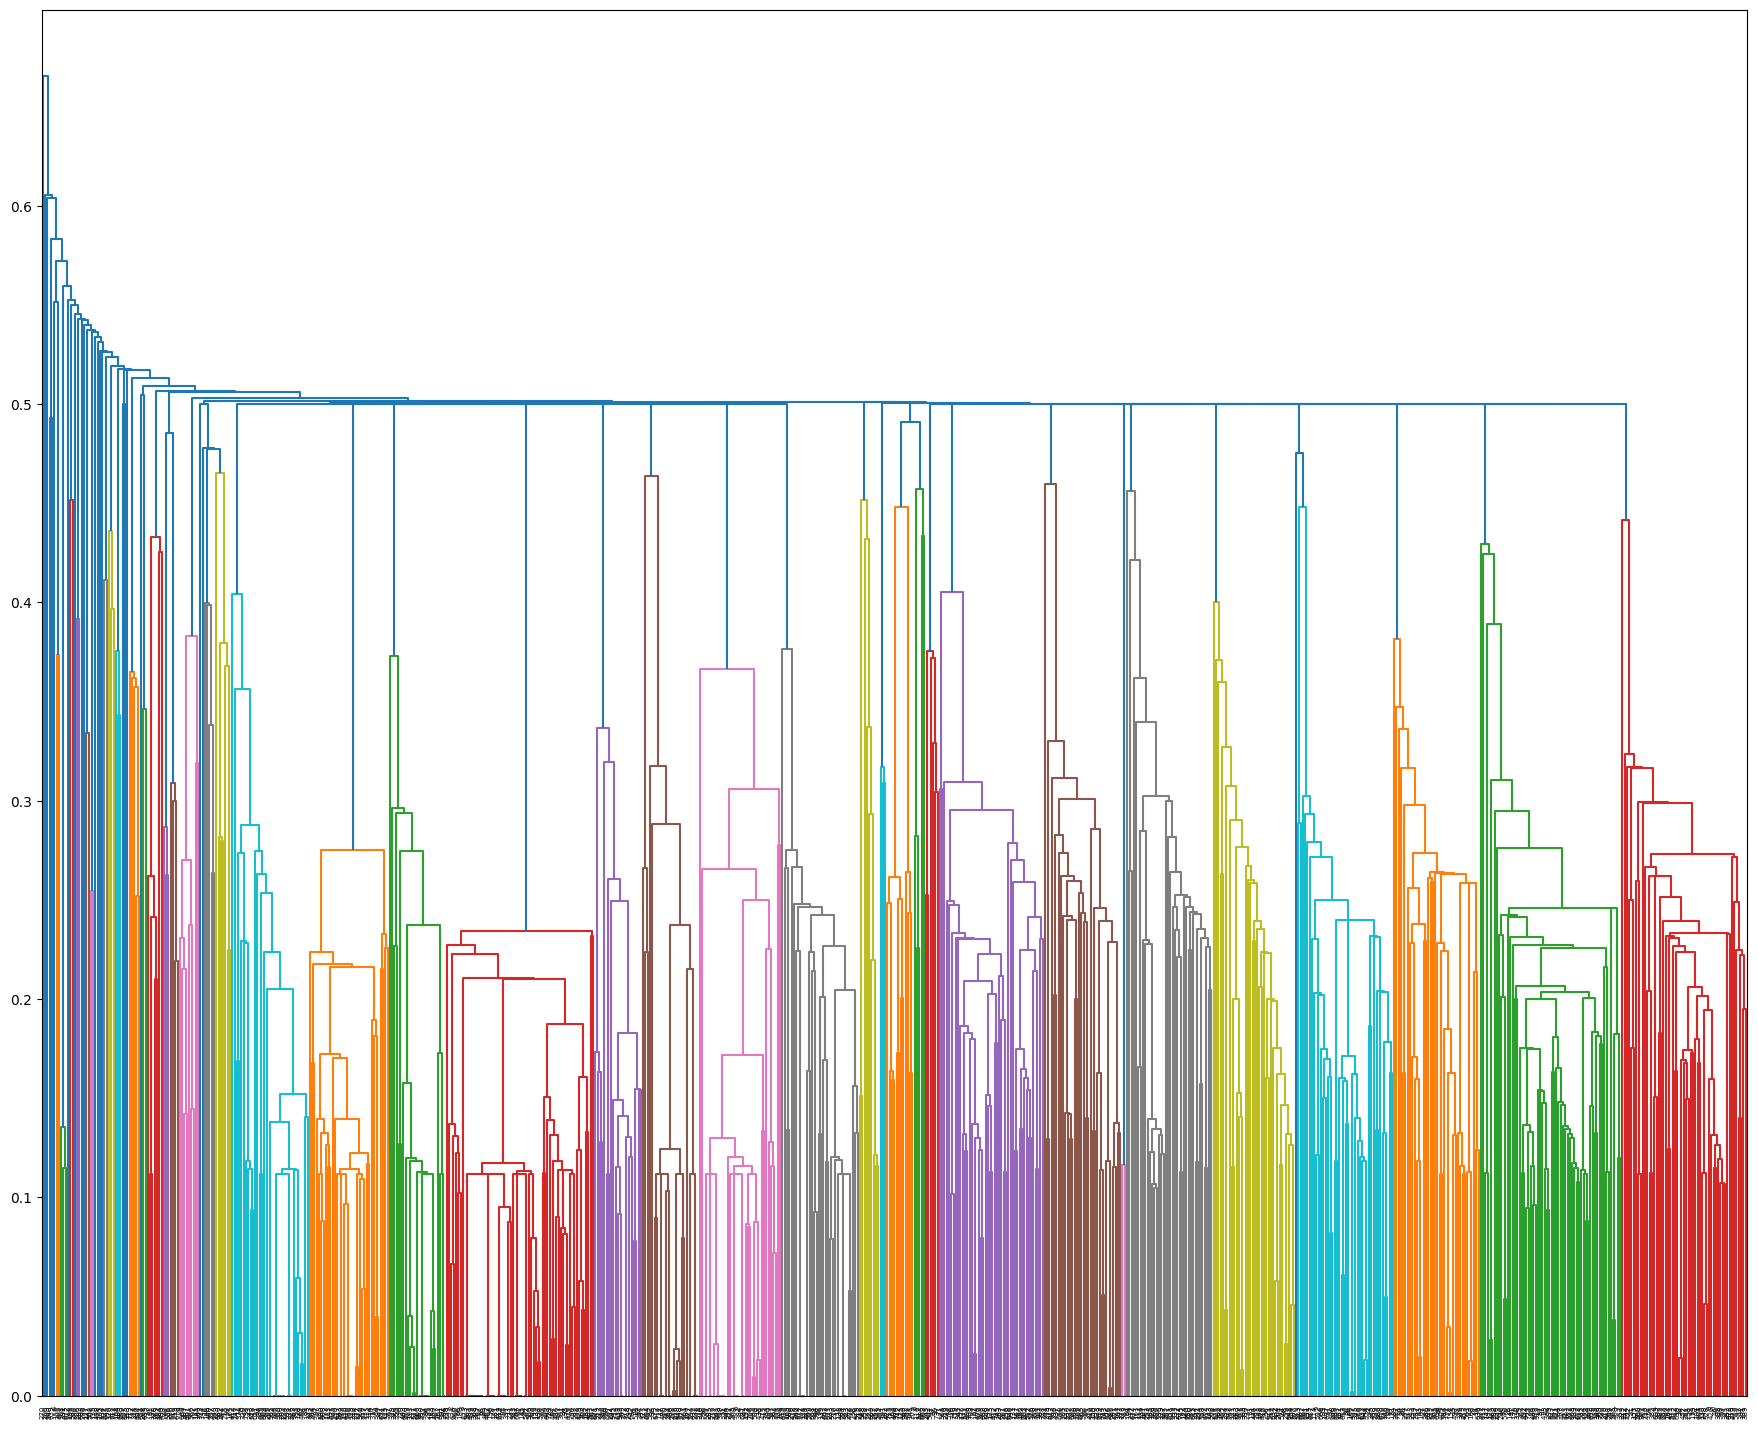

In [21]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'single' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
# single
single = AgglomerativeClustering(n_clusters=2, linkage="single")
single_pred = single.fit_predict(df_scaled)

# complete
complete = AgglomerativeClustering(n_clusters=2, linkage="complete")
complete_pred = complete.fit_predict(df_scaled)

# average
avg = AgglomerativeClustering(n_clusters=2, linkage="average")
avg_pred = avg.fit_predict(df_scaled)

In [23]:
# comparing the 3 linkage using silhouette score
single_silhouette = silhouette_score(df_scaled, single_pred)
complete_silhouette = silhouette_score(df_scaled, complete_pred)
avg_silhouette = silhouette_score(df_scaled, avg_pred)

print( "Scores: \nSingle:", single_silhouette,"\nComplete: ", complete_silhouette, "\nAverage: ", avg_silhouette)

Scores: 
Single: 0.2569890088211664 
Complete:  0.08897334292014233 
Average:  0.2569890088211664


In [24]:
complete_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,

In [25]:
df2_with_clusters =df_scaled.copy()
df2_with_clusters['label']=complete_pred
df2_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,0.181399,0.434211,0.555556,0.2,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0
1,0.045818,0.763158,0.111111,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1
2,0.128665,0.328947,0.888889,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0
3,0.330667,0.539474,0.333333,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1
4,0.309066,0.605263,1.000000,0.4,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0


In [26]:
cluster_0_means = df2_with_clusters[df2_with_clusters['label']==0].mean()
cluster_1_means = df2_with_clusters[df2_with_clusters['label']==1].mean()
# cluster_2_means = df2_with_clusters[df2_with_clusters['label']==2].mean()
means2= pd.DataFrame([cluster_0_means,cluster_1_means])
means2=means2.drop('label',axis=1)
means2

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,0.148983,0.397396,0.650414,0.112234,0.281915,0.203457,0.236702,0.029255,0.103723,0.079787,0.115691
1,0.166461,0.378245,0.215034,0.174124,0.277628,0.165768,0.235849,0.035040,0.103774,0.118598,0.129380


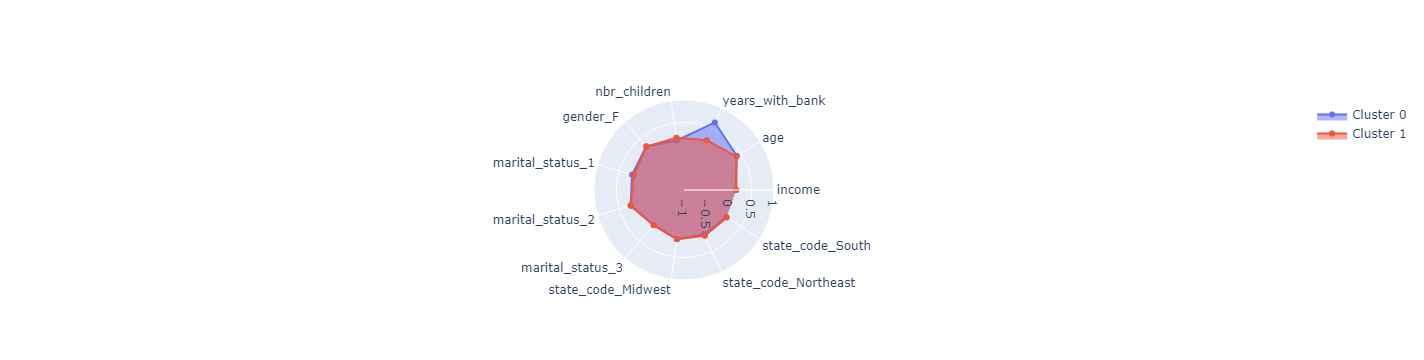

In [27]:

features = list(means2.columns)

fig = go.Figure()

clusters=[0,1]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means2.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-1, 1]
        )),
      showlegend=True
    )

fig.show()

In [28]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

In [107]:
.5##### Compute DBSCAN
db = DBSCAN(eps=0.55, min_samples=15)
db.fit(df_scaled) #algorithm runs

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
#core_samples_mask will be True if the data point was a core point. Otherwise false.

labels = db.labels_
#actual cluster label. If outliers, gets assigned -1

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) #number of unique clusters labels (excluding -1)
n_noise_ = list(labels).count(-1) #counts how many outliers there are (labels with -1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)





Estimated number of clusters: 2
Estimated number of noise points: 70


In [108]:
df3_with_clusters =df_scaled.copy()
df3_with_clusters['label']=labels
df3_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,0.181399,0.434211,0.555556,0.2,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0
1,0.045818,0.763158,0.111111,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0
2,0.128665,0.328947,0.888889,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1
3,0.330667,0.539474,0.333333,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1
4,0.309066,0.605263,1.000000,0.4,0.5,0.0,0.0,0.0,0.0,0.5,0.0,-1


In [109]:
cluster_0_means = df3_with_clusters[df3_with_clusters['label']==0].mean()
cluster_1_means = df3_with_clusters[df3_with_clusters['label']==1].mean()
# cluster_2_means = df3_with_clusters[df3_with_clusters['label']==2].mean()
# cluster_3_means = df3_with_clusters[df3_with_clusters['label']==3].mean()

means3= pd.DataFrame([cluster_0_means,cluster_1_means])
means3=means3.drop('label',axis=1)
means3

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,0.179701,0.488997,0.448304,0.210918,0.276675,0.0,0.436725,0.001241,0.110422,0.099256,0.115385
1,0.098579,0.217633,0.424169,0.000000,0.290146,0.5,0.000000,0.000000,0.087591,0.102190,0.125912


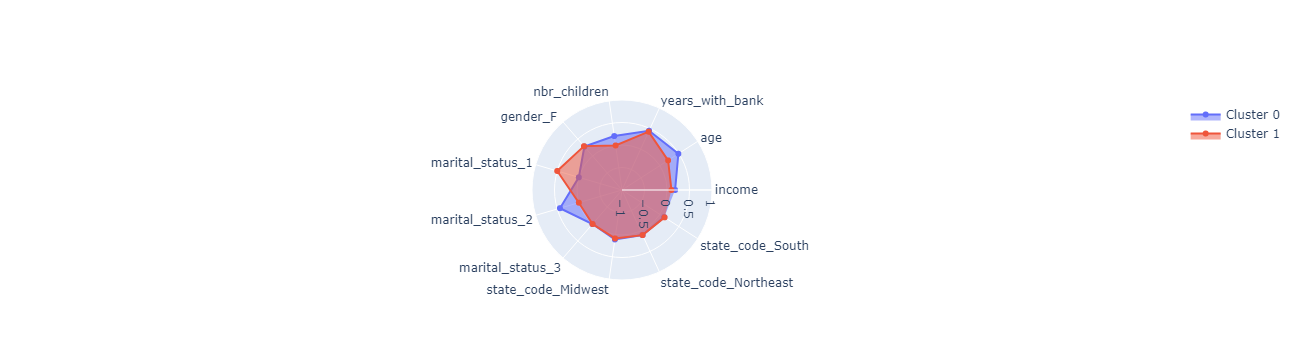

In [110]:
features = list(means3.columns)

fig = go.Figure()

clusters=[0,1]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means3.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-1, 1]
        )),
      showlegend=True
    )

fig.show()

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(df_scaled)


In [34]:
explained_variance= np.insert(pca.explained_variance_ratio_,0,0)

In [35]:
# preparing the cumulative variance
cumulative_variance=np.cumsum(np.round(explained_variance, decimals=3))

In [36]:
pc_df=pd.DataFrame(['','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], columns=['PC'])
explained_variance_df= pd.DataFrame(explained_variance,columns=['Explained Variance'])
cumulative_variance_df= pd.DataFrame(cumulative_variance,columns=['Cumulative Variance'])
df_explained_variance= pd.concat([pc_df,explained_variance_df,cumulative_variance_df],axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.254448,0.254
2,PC2,0.164805,0.419
3,PC3,0.115146,0.534
4,PC4,0.105761,0.640
5,PC5,0.098854,0.739
6,PC6,0.092206,0.831
7,PC7,0.065359,0.896
8,PC8,0.034125,0.930
9,PC9,0.032156,0.962


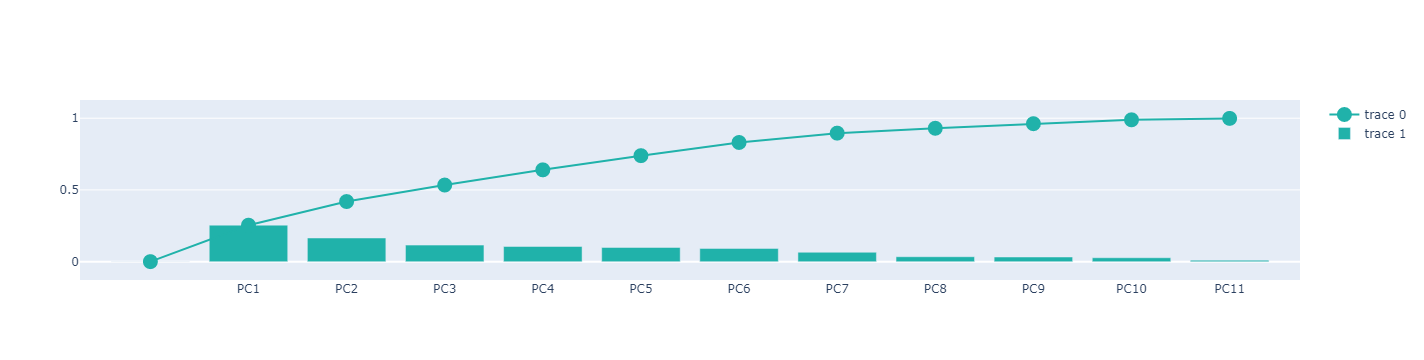

In [37]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(
    go.Scatter(
        x= df_explained_variance['PC'],
        y= df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="lightSeaGreen")
    ))
fig.add_trace(
    go.Bar(
        x = df_explained_variance['PC'],
        y = df_explained_variance['Explained Variance'],
        marker=dict(color="lightSeaGreen")
    ))
fig.show()

In [47]:
pca=PCA(n_components=4).set_output(transform="pandas")
df_pca = pca.fit_transform(df_scaled)
df_pca.head()

,pca0,pca1,pca2,pca3
0,-0.328359,0.037416,0.236529,-0.080196
1,-0.328794,-0.278447,0.145223,-0.336494
2,0.314560,0.540505,-0.198487,0.061667
3,0.288463,0.048330,-0.214579,-0.068713
4,-0.253806,0.468758,-0.250108,0.094599


In [39]:
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['label'] = df_scaled_with_clusters['label']
df_pca_with_clusters.head()

,pca0,pca1,pca2,pca3,label
0,-0.328359,0.037416,0.236529,-0.080196,0
1,-0.328794,-0.278447,0.145223,-0.336494,2
2,0.314560,0.540505,-0.198487,0.061667,1
3,0.288463,0.048330,-0.214579,-0.068713,1
4,-0.253806,0.468758,-0.250108,0.094599,0


In [40]:
# to visualize centroids in PCA space
pca_centroids = pca.transform(km.cluster_centers_)
pca_centroids

,pca0,pca1,pca2,pca3
0,-0.363993,0.233260,0.009815,0.002573
1,0.444021,0.083553,0.004241,-0.034143
2,-0.261178,-0.296379,-0.024160,-0.024761
3,-0.023124,-0.156658,0.015221,0.149591


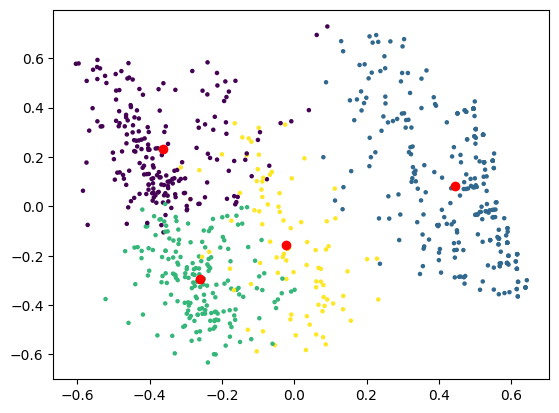

In [41]:
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca1'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca1'], c='red')

plt.show()

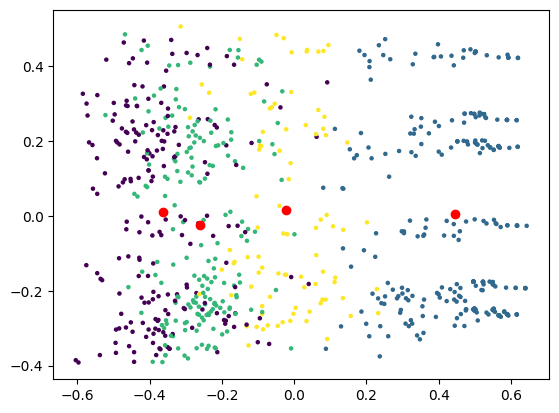

In [42]:
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca2'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca2'], c='red')
plt.show()

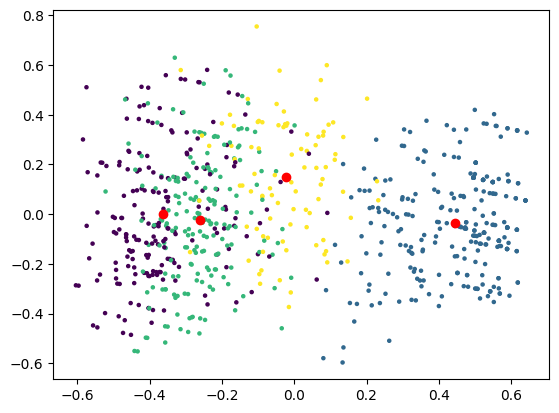

In [43]:
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca3'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca3'], c='red')
plt.show()

In [44]:

def steps(x):
    km = KMeans(n_clusters=4, # how many clusters we expected 
                n_init=x, # how many initial runs
                random_state=0)

    # fit and predict
    y_km = km.fit_predict(df_scaled)
    
   # finding PCA

    pca = PCA(n_components=None)

    dfx_pca = pca.fit(df_scaled)
    pca=PCA(n_components=4).set_output(transform="pandas")
    df_pca = pca.fit_transform(df_scaled)
    df_pca_with_clusters = df_pca.copy()
    df_pca_with_clusters['label'] = df_scaled_with_clusters['label']
    pca_centroids = pca.transform(km.cluster_centers_)
    plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca1'], c=df_pca_with_clusters['label'], s=5)
    plt.scatter(pca_centroids['pca0'],pca_centroids['pca1'], c='red')
    plt.show()

step 1


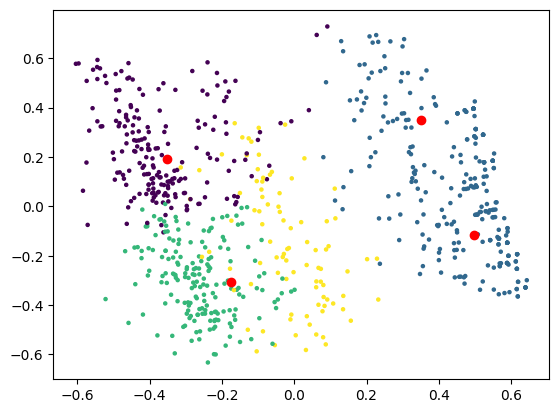

step 2


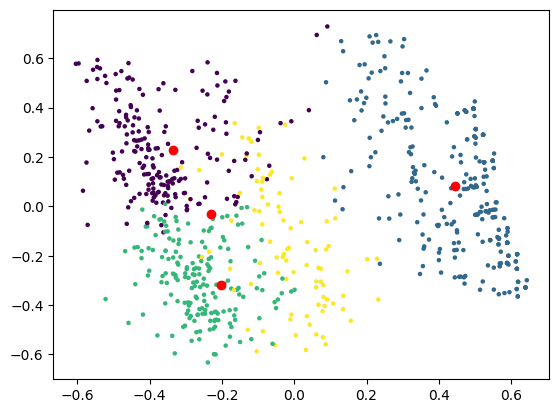

step 3


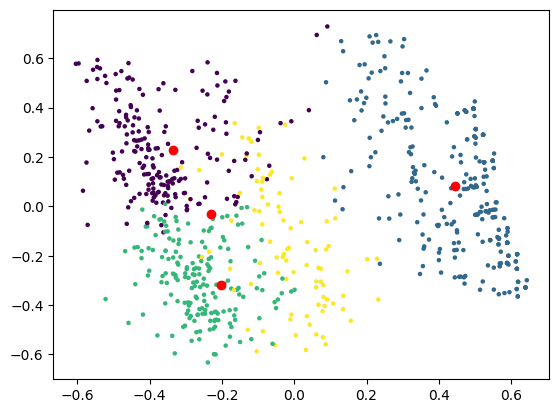

step 4


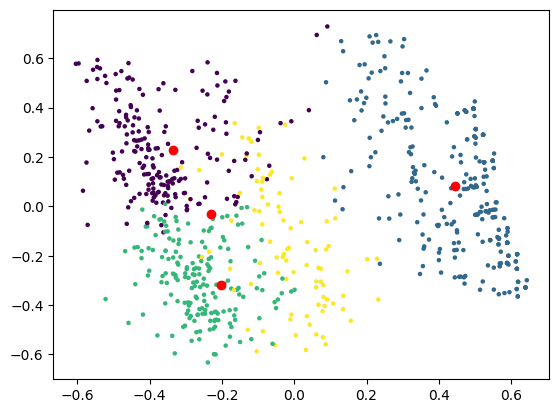

step 5


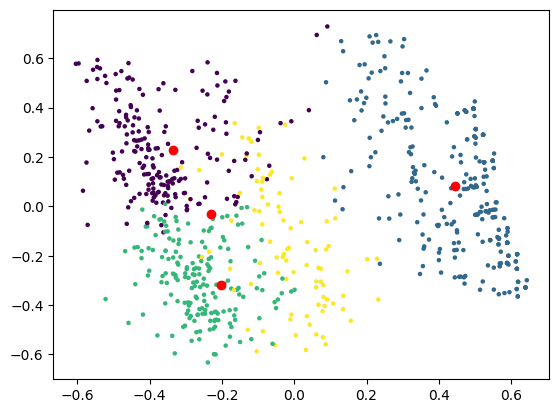

step 6


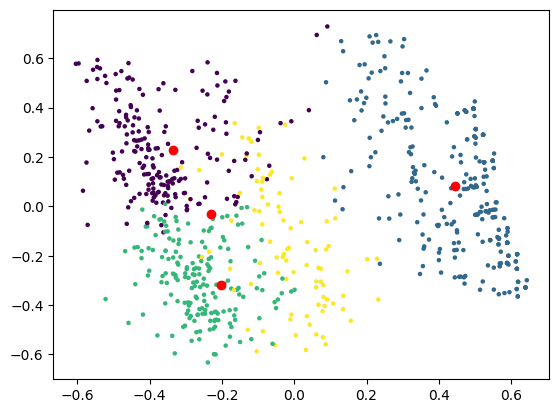

step 7


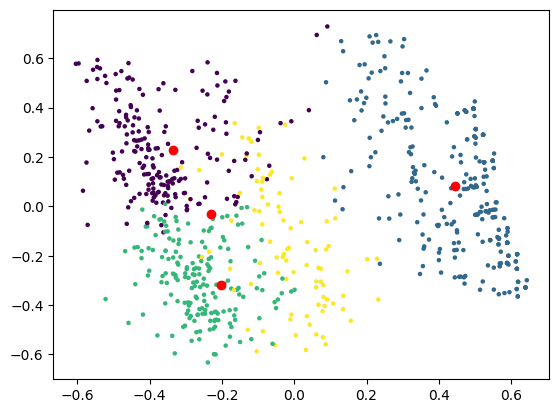

step 8


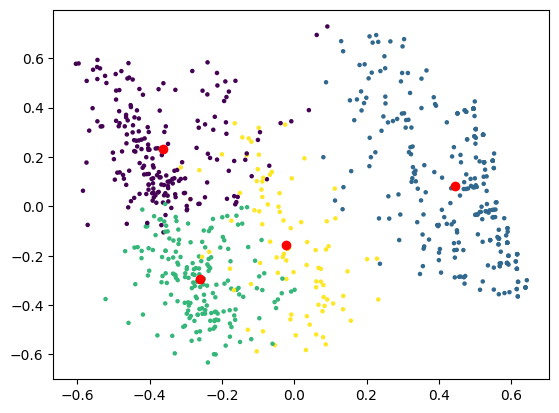

step 9


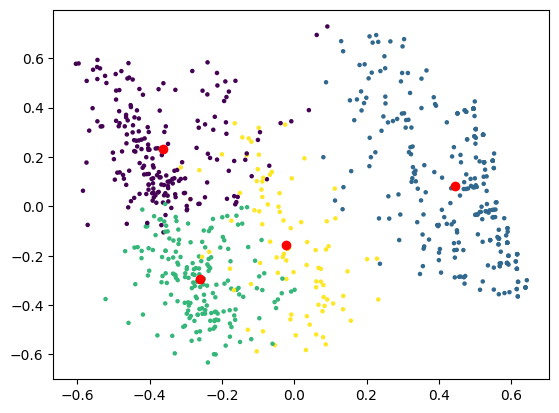

step 10


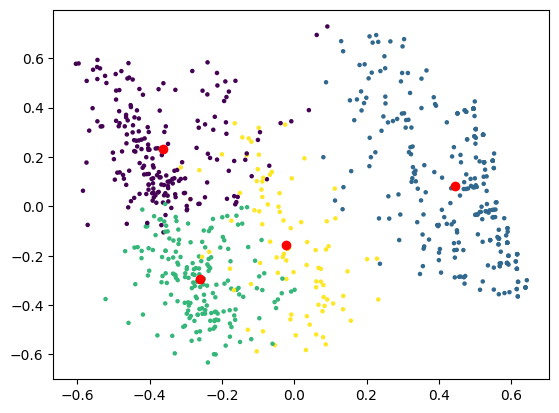

In [45]:

for i in range(1,11):
    print( f'step {i}')
    steps(i)

In [84]:
pca=PCA(n_components=11).set_output(transform="pandas")
df_pca1 = pca.fit_transform(df_scaled)
df_pca1.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-0.328359,0.037416,0.236529,-0.080196,-0.102294,0.042801,-0.142487,0.164808,0.047110,0.074606,-0.011041
1,-0.328794,-0.278447,0.145223,-0.336494,0.294114,-0.010372,-0.080820,0.285685,-0.032498,0.002383,-0.030798
2,0.314560,0.540505,-0.198487,0.061667,-0.066199,0.016944,0.014845,0.128689,0.124544,0.004060,-0.023820
3,0.288463,0.048330,-0.214579,-0.068713,0.176336,-0.022894,0.211533,0.122885,0.305339,-0.034672,-0.040411
4,-0.253806,0.468758,-0.250108,0.094599,-0.249543,0.403614,0.372289,-0.102902,-0.025100,-0.125603,0.189648


In [85]:
# import Kmeans from sklearn
from sklearn.cluster import KMeans


inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca1)
    inertias.append(kmeanModel.inertia_)

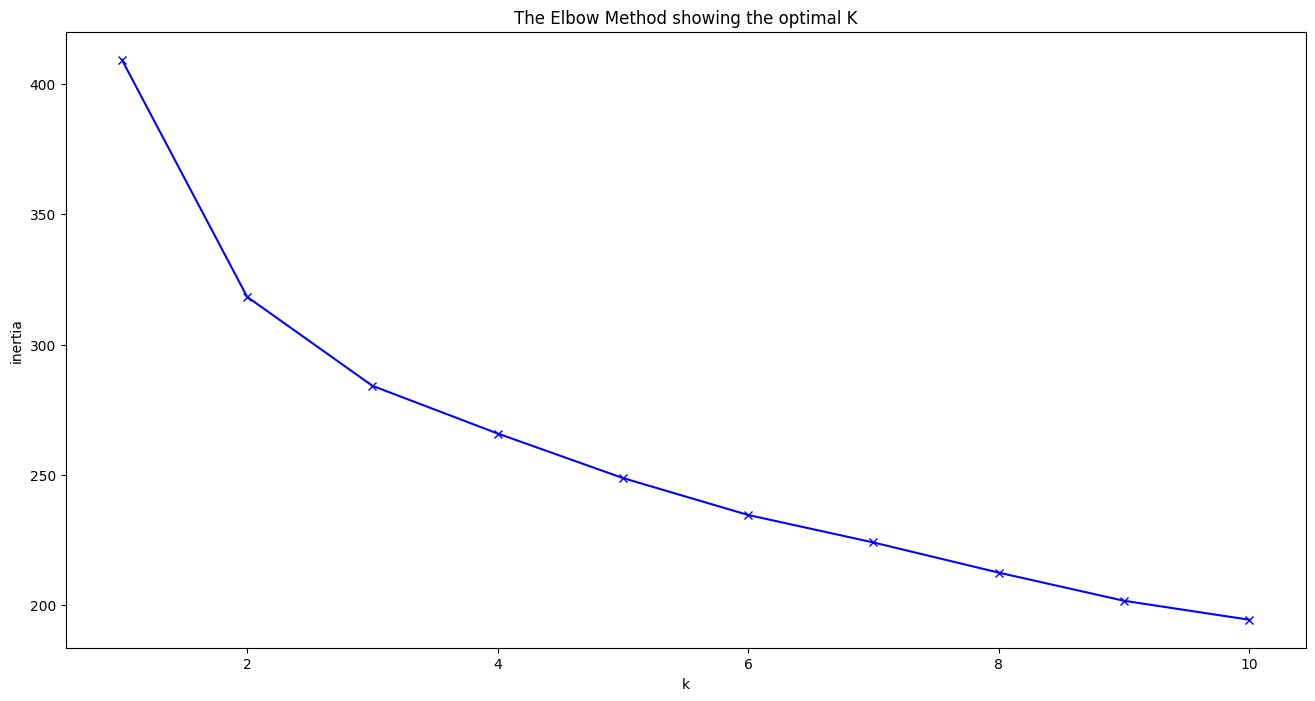

In [86]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [87]:
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca1)
    label=kmeanModel.predict(df_pca1)
    silhouettes.append(silhouette_score(df_pca,label))

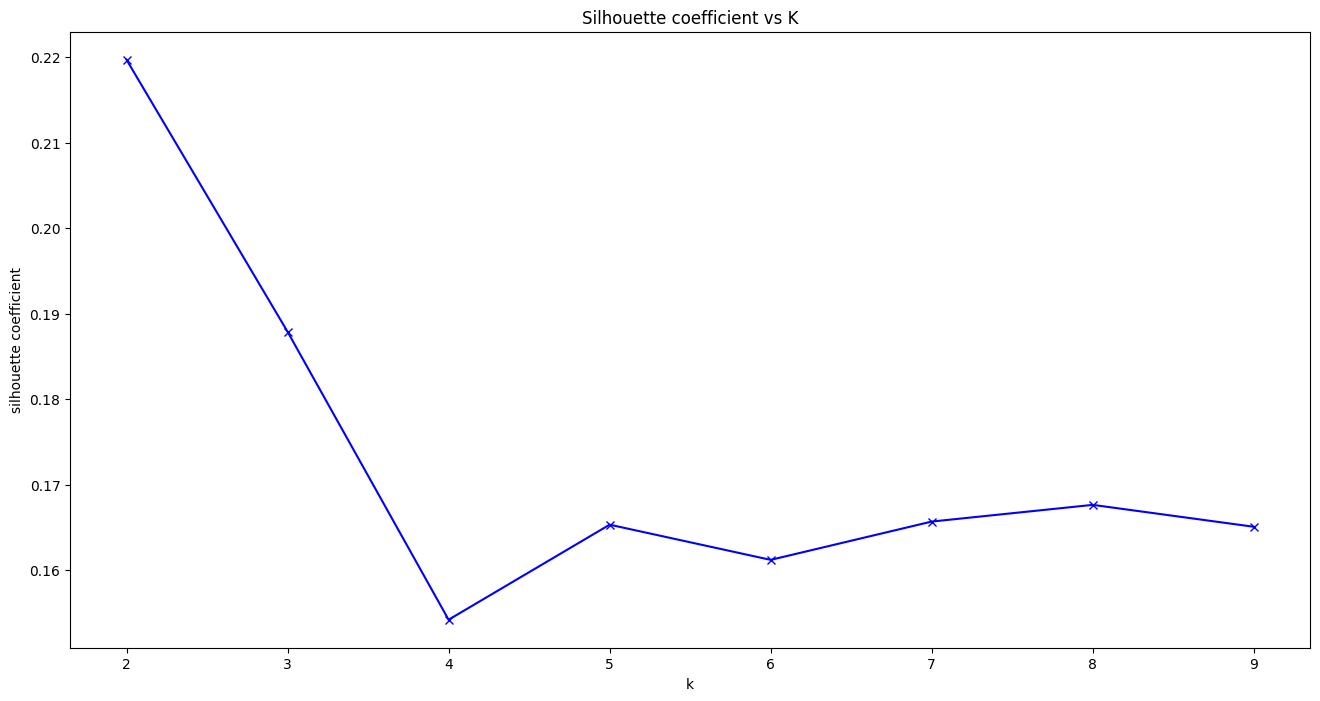

In [88]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [89]:
km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km1 = km.fit_predict(df_pca1)

In [90]:
y_km1

array([2, 4, 0, 0, 2, 1, 3, 2, 1, 2, 0, 3, 4, 0, 1, 3, 1, 3, 2, 3, 4, 4,
       2, 0, 1, 4, 1, 2, 2, 4, 4, 4, 1, 2, 0, 1, 3, 4, 3, 0, 2, 1, 4, 2,
       0, 4, 2, 1, 2, 4, 3, 3, 2, 2, 0, 0, 4, 0, 3, 2, 1, 0, 3, 0, 2, 0,
       0, 2, 0, 0, 0, 1, 4, 4, 2, 2, 4, 4, 0, 3, 4, 2, 0, 0, 2, 2, 4, 4,
       3, 2, 1, 0, 0, 0, 0, 3, 0, 0, 4, 1, 2, 2, 2, 4, 2, 4, 2, 2, 2, 0,
       0, 2, 2, 0, 1, 2, 1, 4, 2, 2, 1, 1, 1, 1, 3, 0, 0, 4, 1, 0, 2, 4,
       0, 4, 2, 0, 2, 2, 3, 3, 2, 2, 2, 1, 2, 0, 2, 2, 4, 1, 0, 4, 4, 4,
       4, 2, 3, 4, 1, 2, 2, 2, 0, 1, 2, 1, 4, 2, 4, 3, 4, 2, 4, 4, 4, 2,
       2, 2, 2, 4, 3, 0, 0, 0, 2, 4, 4, 1, 0, 1, 3, 1, 3, 0, 1, 0, 0, 0,
       1, 1, 2, 2, 3, 0, 4, 2, 1, 4, 1, 2, 3, 0, 2, 3, 0, 1, 3, 1, 4, 1,
       0, 1, 1, 1, 3, 1, 3, 4, 1, 4, 0, 0, 3, 3, 0, 3, 1, 2, 0, 2, 1, 3,
       0, 0, 3, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 2, 4, 4, 2, 1, 2,
       0, 0, 4, 0, 1, 1, 1, 0, 0, 3, 2, 1, 3, 4, 4, 1, 0, 2, 2, 1, 1, 3,
       1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 3, 2, 3, 3, 0,

In [93]:
df_pca1_with_clusters =df_pca1.copy()
df_pca1_with_clusters['label']=y_km1
df_pca1_with_clusters.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,label
0,-0.328359,0.037416,0.236529,-0.080196,-0.102294,0.042801,-0.142487,0.164808,0.047110,0.074606,-0.011041,2
1,-0.328794,-0.278447,0.145223,-0.336494,0.294114,-0.010372,-0.080820,0.285685,-0.032498,0.002383,-0.030798,4
2,0.314560,0.540505,-0.198487,0.061667,-0.066199,0.016944,0.014845,0.128689,0.124544,0.004060,-0.023820,0
3,0.288463,0.048330,-0.214579,-0.068713,0.176336,-0.022894,0.211533,0.122885,0.305339,-0.034672,-0.040411,0
4,-0.253806,0.468758,-0.250108,0.094599,-0.249543,0.403614,0.372289,-0.102902,-0.025100,-0.125603,0.189648,2


In [94]:
cluster_0_means = df_pca1[df_pca1_with_clusters['label']==0].mean()
cluster_1_means = df_pca1[df_pca1_with_clusters['label']==1].mean()
cluster_2_means = df_pca1[df_pca1_with_clusters['label']==2].mean()
cluster_3_means = df_pca1[df_pca1_with_clusters['label']==3].mean()
cluster_4_means = df_pca1[df_pca1_with_clusters['label']==4].mean()
means4= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means])
means4

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,0.447671,0.093490,-0.190436,0.044766,0.040933,0.004787,-0.009827,-0.003954,0.050745,-0.027696,-0.015289
1,-0.151277,-0.293875,0.021952,0.166323,-0.182650,-0.020747,0.115362,-0.001344,-0.026026,-0.014951,0.001984
2,-0.338633,0.248255,0.023246,0.028077,-0.023906,0.031612,-0.022466,-0.003495,-0.015182,0.024856,0.014296
3,0.436125,0.069747,0.271196,-0.140802,-0.012705,-0.005513,-0.021245,-0.004037,0.005087,-0.030893,-0.014343


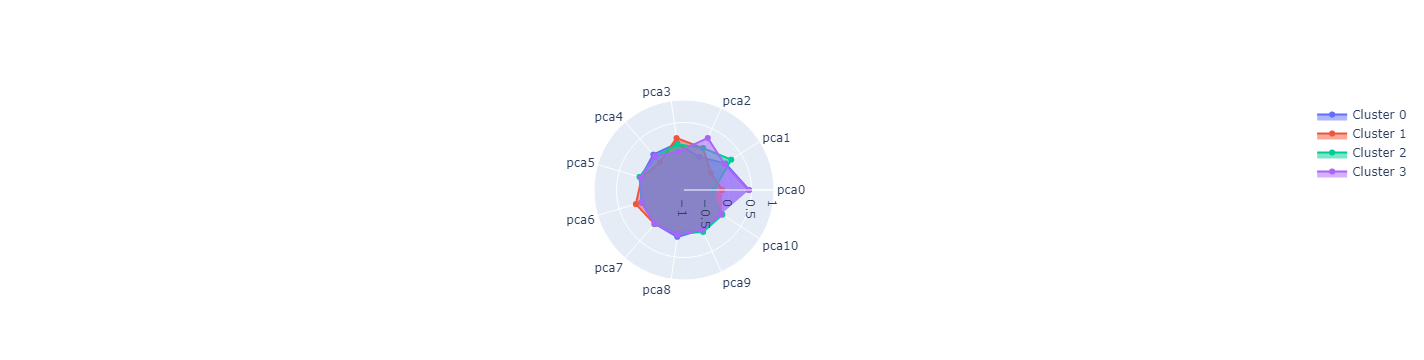

In [95]:
features = list(means4.columns)

fig = go.Figure()

clusters=[0,1,2,3]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means4.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-1, 1]
        )),
      showlegend=True
    )

fig.show()

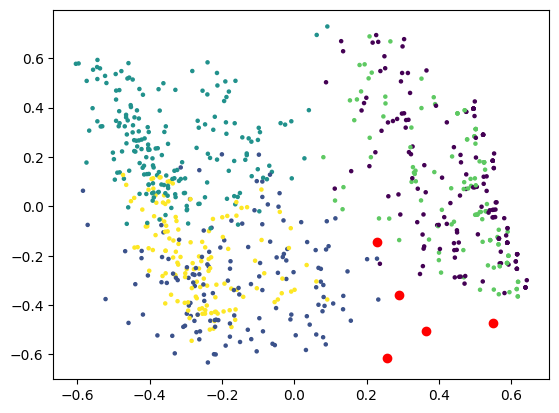

In [96]:
    pca_centroids = pca.transform(km.cluster_centers_)
    plt.scatter(df_pca1_with_clusters['pca0'],df_pca1_with_clusters['pca1'], c=df_pca1_with_clusters['label'], s=5)
    plt.scatter(pca_centroids['pca0'],pca_centroids['pca1'], c='red')
    plt.show()